Import Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling  import RandomOverSampler
from sklearn.ensemble        import RandomForestClassifier, IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

Import Dataset

In [3]:
creditcard_df = pd.read_csv('creditcard.csv')

## UNSUPERVISED LEARNING 

Since the dataset is highly unbalanced thus we can use anomally detection techniques to identify the frauds in the credit card transactions

**Isolation Forest**

Dividing the data into fraud and valid transactions 

In [4]:
non_fraud = creditcard_df[creditcard_df['Class']==0]
fraud = creditcard_df[creditcard_df['Class']==1]

In [5]:
contamination_factor = fraud.shape[0] / creditcard_df.shape[0]
contamination_factor

0.001727485630620034

In [6]:
features_data = creditcard_df.drop(['Class'], axis=1)

Isolation Forest model

In [7]:
isf_clf = IsolationForest(contamination=contamination_factor)

In [8]:
isf_clf.fit(features_data)

IsolationForest(contamination=0.001727485630620034)

In [9]:
y_pred_isf = isf_clf.predict(features_data)

In [10]:
y_pred_isf[y_pred_isf==1]=0
y_pred_isf[y_pred_isf==-1]=1

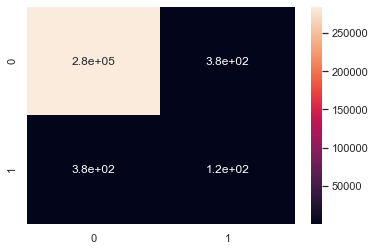

In [12]:
cm_isf = confusion_matrix(creditcard_df['Class'],y_pred_isf)
sns.heatmap(cm_isf, annot =True)

In [13]:
print('Accuracy for Isolation Factor is ', accuracy_score(creditcard_df['Class'],y_pred_isf))

Accuracy for Isolation Factor is  0.9973596154588897


In [15]:
print('Classification Report for Isolation Factor')
print(classification_report(creditcard_df['Class'],y_pred_isf))

Classification Report for Isolation Factor
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.24      0.24      0.24       492

    accuracy                           1.00    284807
   macro avg       0.62      0.62      0.62    284807
weighted avg       1.00      1.00      1.00    284807



**Here you can see that accuracy in fraud prediction is considerable low when compared to supervised learning but we should also consider that in unsupervised learning everything our algorithm is seeing, it is seeing for the first time.**

**This can be improved by varying and using some parameters in these algorithms.**